In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [10]:
df_raw = pd.read_csv('baseball.csv')
df_raw.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [11]:
df_raw['RD'] = df_raw['RS'] - df_raw['RA']
df_raw.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [12]:
# Team
# League
# Year
# Runs Scored (RS)
# Runs Allowed (RA)
# Wins (W)
# On-Base Percentage (OBP)
# Slugging Percentage (SLG)
# Batting Average (BA)
# Playoffs (binary)
# RankSeason
# RankPlayoffs
# Games Played (G)
# Opponent On-Base Percentage (OOBP)
# Opponent Slugging Percentage (OSLG)

In [13]:
df_raw.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG', 'RD'],
      dtype='object')

In [14]:
df = df_raw[['OBP', 'SLG', 'BA', 'Playoffs', 'RD']]
target = ['Playoffs']
features = ['OBP', 'SLG', 'BA', 'RD']

In [15]:
X = df[features].values
y = df[target].values.ravel()

split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size)

<AxesSubplot:>

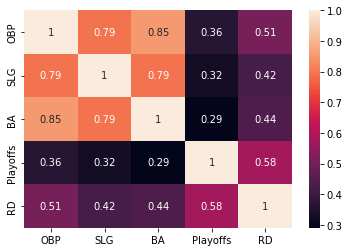

In [23]:
sns.heatmap(df.corr(method='pearson'), annot = True)

## Regressão Linear

In [16]:
rl = linear_model.LinearRegression()
rl.fit(X_train, y_train.ravel())
y_pred_rl = rl.predict(X_test)
print(mean_squared_error(y_test,y_pred_rl))
rl.coef_ 

0.10348818860002301


array([ 2.77282748e+00,  1.25877114e+00, -3.99478403e+00,  2.04276595e-03])

## Árvore de decisão - Class

In [26]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
y_pred_treeclf = tree_clf.predict(X_test)

print(tree.export_text(tree_clf))

print(confusion_matrix(y_test,y_pred_treeclf))

print("")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_treeclf))
print("Precision:",metrics.precision_score(y_test, y_pred_treeclf))
print("Recall:",metrics.recall_score(y_test, y_pred_treeclf))
print("F1-Score:",metrics.f1_score(y_test, y_pred_treeclf))

|--- feature_3 <= 85.50
|   |--- feature_3 <= 40.50
|   |   |--- class: 0
|   |--- feature_3 >  40.50
|   |   |--- class: 0
|--- feature_3 >  85.50
|   |--- feature_3 <= 165.50
|   |   |--- class: 1
|   |--- feature_3 >  165.50
|   |   |--- class: 1

[[268  24]
 [ 18  60]]

Accuracy: 0.8864864864864865
Precision: 0.7142857142857143
Recall: 0.7692307692307693
F1-Score: 0.7407407407407408


## KNN

In [18]:
acc_knn = []
k_history = []
f1_knn = []
for i in range(1, 20):
    k_history.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn.append(metrics.accuracy_score(y_test, y_pred_knn))
    f1_knn.append(metrics.f1_score(y_test, y_pred_knn))

In [19]:
df_knn = pd.DataFrame({'K':k_history, 'ACC':acc_knn, 'F1':f1_knn})
df_knn.sort_values(by = 'F1', inplace=True, ascending=False)
df_knn

,K,ACC,F1
18,19,0.886486,0.737500
13,14,0.886486,0.734177
12,13,0.878378,0.723926
14,15,0.878378,0.723926
17,18,0.883784,0.722581
16,17,0.881081,0.721519
10,11,0.875676,0.719512
11,12,0.883784,0.718954
6,7,0.878378,0.716981
15,16,0.878378,0.713376
